<a href="https://colab.research.google.com/github/LolaSchnaider/LolaSchnaider/blob/main/DS4E_Mid_Term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<center>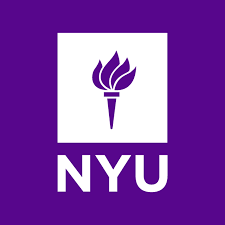</center>

___

## <center>Data Science 4 Everyone 🚀</center>

<center>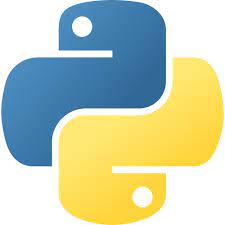</center>

### <center>Session: Streamlit Data + Visualization + Model </center>

<center>Course provided by:</center>

[<center>Professor Gaëtan Brison</center>](https://github.com/gaetanbrison)
___

In [ ]:
!curl ipecho.net/plain

34.83.166.109

In [ ]:
!pip install streamlit --quiet
!pip install pyngrok --quiet
!pip install htbuilder --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.7/718.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# @title Default title text
# This is breaking the code
# Load the Youtube logo image >>>>>>>>>>>>
# image_youtube = Image.open('youtube.png')
# Display the Youtube logo on the Streamlit app
# st.image(image_youtube, width=100)

%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
import plotly.express as px
import streamlit as st
import random
from PIL import Image
import altair as alt



# Set the title for the Streamlit app >>>>>>>>>>>>
st.title("YOUTUBE TREND PREDICTOR")

# Create a sidebar header and a separator
st.sidebar.header("Dashboard")
st.sidebar.markdown("---")

# Dropdown menu for selecting the page mode (Introduction, Visualization, Prediction)
app_mode = st.sidebar.selectbox('🔎 Select Page',['Introduction','Visualization','Prediction'])

# Dropdown menu for selecting the dataset (currently only "Wine Quality" is available)
select_dataset =  st.sidebar.selectbox('💾 Select Dataset',["Youtube Data"])

# Load the wine quality dataset >>>>>>>>>>>>
df = pd.read_csv("usvideosedited.csv")
dfnew = df[["views", "trending_date", "dislikes", "comment_count", "comments_disabled", "ratings_disabled", "video_error_or_removed"]]
dfnew["comments_disabled"] = dfnew["comments_disabled"].astype("category").cat.codes
dfnew["ratings_disabled"] = dfnew["ratings_disabled"].astype("category").cat.codes
dfnew["video_error_or_removed"] = dfnew["video_error_or_removed"].astype("category").cat.codes

# Dropdown menu for selecting which variable from the dataset to predict
list_variable = ["views"]
list_variables = df.columns
select_variable =  st.sidebar.selectbox('🎯 Select Variable to Predict',list_variable)

# Introduction page content
if app_mode == 'Introduction':
    # Display dataset details
    st.markdown("### 00 - Show Dataset")

    # Split the page into 10 columns to display information about each wine quality variable
    col1, col2, col3, col4, col5, col6, col7, col8, col9, col10 = st.columns(10)

    # Descriptions for each variable in the dataset
    # ... [The code here provides descriptions for each wine quality variable]

    # Allow users to view either the top or bottom rows of the dataset
    num = st.number_input('No. of Rows', 5, 10)
    head = st.radio('View from top (head) or bottom (tail)', ('Head', 'Tail'))
    if head == 'Head':
        st.dataframe(df.head(num))
    else:
        st.dataframe(df.tail(num))

    # Display the shape (number of rows and columns) of the dataset
    st.markdown("Number of rows and columns helps us to determine how large the dataset is.")
    st.text('(Rows,Columns)')
    st.write(df.shape)

    st.markdown("### 01 - Description")
    st.dataframe(df.describe())



    st.markdown("### 02 - Missing Values")
    st.markdown("Missing values are known as null or NaN values. Missing data tends to **introduce bias that leads to misleading results.**")
    dfnull = df.isnull().sum()/len(df)*100
    totalmiss = dfnull.sum().round(2)
    st.write("Percentage of total missing values:",totalmiss)
    st.write(dfnull)
    if totalmiss <= 30:
        st.success("Looks good! as we have less then 30 percent of missing values.")
    else:
        st.warning("Poor data quality due to greater than 30 percent of missing value.")
        st.markdown(" > Theoretically, 25 to 30 percent is the maximum missing values are allowed, there's no hard and fast rule to decide this threshold. It can vary from problem to problem.")

    st.markdown("### 03 - Completeness")
    st.markdown(" Completeness is defined as the ratio of non-missing values to total records in dataset.")
    # st.write("Total data length:", len(df))
    nonmissing = (df.notnull().sum().round(2))
    completeness= round(sum(nonmissing)/len(df),2)
    st.write("Completeness ratio:",completeness)
    st.write(nonmissing)
    if completeness >= 0.80:
        st.success("Looks good! as we have completeness ratio greater than 0.85.")

    else:
        st.success("Poor data quality due to low completeness ratio( less than 0.85).")


if app_mode == 'Visualization':
    # Display a header for the Visualization section
    st.markdown("## Visualization")

    # Allow users to select two variables from the dataset for visualization
    symbols = st.multiselect("Select two variables", list_variables, ["views", "likes"])

    # Create a slider in the sidebar for users to adjust the plot width
    width1 = st.sidebar.slider("plot width", 1, 25, 10)

    # Create tabs for different types of visualizations
    tab1, tab2 = st.tabs(["Line Chart", "📈 Correlation"])

    # Content for the "Line Chart" tab
    tab1.subheader("Line Chart")
    # Display a line chart for the selected variables
    st.line_chart(data=df, x=symbols[0], y=symbols[1], width=0, height=0, use_container_width=True)
    # Display a bar chart for the selected variables
    st.bar_chart(data=df, x=symbols[0], y=symbols[1], use_container_width=True)

    # Content for the "Correlation" tab
    tab2.subheader("Correlation Tab 📉")
    # Create a heatmap to show correlations between variables in the dataset
    fig, ax = plt.subplots(figsize=(width1, width1))
    sns.heatmap(df.corr(), cmap=sns.cubehelix_palette(8), annot=True, ax=ax)
    tab2.write(fig)

    # Display a pairplot for the first five variables in the dataset
    st.markdown("### Pairplot")
    df2 = df
    fig3 = sns.pairplot(df2)
    st.pyplot(fig3)

# Check if the app mode is set to 'Prediction'
if app_mode == 'Prediction':
    # Display a header for the Prediction section
    st.markdown("## Prediction")

    # Allow users to adjust the size of the training dataset using a slider in the sidebar
    train_size = st.sidebar.number_input("Train Set Size", min_value=0.00, step=0.01, max_value=1.00, value=0.70)

    # Drop the selected variable from the dataset to prepare for prediction
    new_df = df.drop(labels=select_variable, axis=1)
    list_var = new_df.columns

    # Allow users to select explanatory variables for prediction
    output_multi = st.multiselect("Select Explanatory Variables", list_var)

    # Define a function to perform linear regression prediction
    def predict(target_choice, train_size, new_df, output_multi):
      """
      This function performs linear regression prediction.

      Parameters:
      - target_choice: The target variable to be predicted.
      - train_size: The proportion of the dataset to include in the training set.
      - new_df: The dataframe without the target variable.
      - output_multi: The explanatory variables selected by the user.

      Returns:
      - X_train, X_test: Training and testing data.
      - y_train, y_test: Training and testing target values.
      - predictions: Predicted values for the test set.
      - x, y: Full dataset split into explanatory variables and target variable.
      """

      # Select the explanatory variables based on user input
      new_df2 = new_df[output_multi]
      x = new_df2
      y = df[target_choice]

      # Display the top 25 rows of the explanatory and target variables in the Streamlit app
      col1, col2 = st.columns(2)
      col1.subheader("Feature Columns top 25")
      col1.write(x.head(25))
      col2.subheader("Target Column top 25")
      col2.write(y.head(25))

      # Split the data into training and testing sets
      X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    # Initialize and train a linear regression model
      lm = LinearRegression()
      lm.fit(X_train,y_train)

    # Predict the target variable for the test set
      predictions = lm.predict(X_test)

      return X_train, X_test, y_train, y_test, predictions, x, y

    # Call the prediction function and store the results
    X_train, X_test, y_train, y_test, predictions, x, y = predict(select_variable, train_size, new_df, list_var)
    # Display the results header in the Streamlit app
    st.subheader('🎯 Results')

    # Display various metrics about the prediction results in the Streamlit app >>>>>>>>>>>>
    st.write("1) The model explains,", np.round(mt.explained_variance_score(y_test, predictions)*100,2),"% variance of the target feature")
    st.write("2) The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(predictions,y_test),2))
    st.write("3) MSE: ", np.round(mt.mean_squared_error(predictions,y_test),2))
    st.write("4) The R-Square score of the model is " , np.round(mt.r2_score(predictions,y_test),2))






Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule yargs@17.1.1 ch


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.221.41.208:8501

npx: installed 22 in 2.443s


In [ ]:
!pip freeze > requirements.txt